In [1]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = ""
os.environ["JAX_PLATFORMS"] = "cpu"
os.environ["JAX_ENABLE_X64"] = "True"


In [2]:
import matplotlib.pyplot as plt 
from bpd.io import load_dataset
import jax.numpy as jnp

## Interim samples

In [4]:
ds = load_dataset("/pscratch/sd/i/imendoza/data/cache_chains/exp40_42/interim_samples_42_plus.npz")

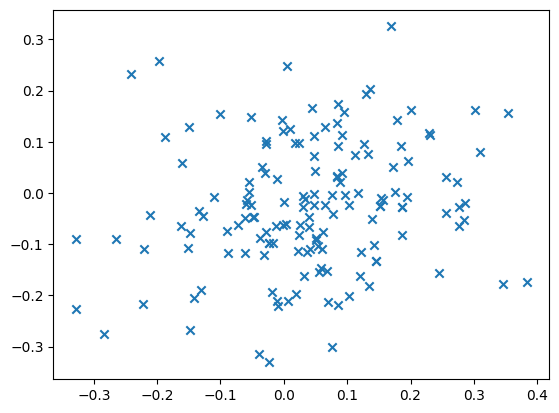

In [5]:
e_post = ds['e_post']
for ii in range(1):
    plt.scatter(e_post[ii, :150, 0], e_post[ii, :150, 1], marker='x')

## Jackknife results

In [14]:
g_means_best = jnp.load("/pscratch/sd/i/imendoza/data/cache_chains/exp40_42/g_samples_jack_42_42.npy")
g_plus_samples = jnp.load("/pscratch/sd/i/imendoza/data/cache_chains/exp40_42/g_samples_42_42_plus.npy")
g_means_best.shape, g_plus_samples.shape

((10, 2), (3000, 2))

In [29]:
g_minus_samples = jnp.load("/pscratch/sd/i/imendoza/data/cache_chains/exp40_42/g_samples_42_42_minus.npy")

In [15]:
g_means_best.mean(axis=0), g_plus_samples.mean(axis=0)

(Array([ 1.97574675e-02, -8.00175022e-06], dtype=float64),
 Array([ 1.96979209e-02, -4.42939238e-05], dtype=float64))

In [17]:
# jackknife error 
jack_err = jnp.sqrt(g_means_best.var(axis=0) * (g_means_best.shape[0]-1))
jack_err

Array([8.58946928e-05, 6.32937266e-05], dtype=float64)

In [19]:
err_g = g_plus_samples.std(axis=0)

In [21]:
err_g / jack_err # > 10 times reduction in err

Array([14.77085222, 20.01591207], dtype=float64)

In [24]:
# multiplicative bias 
g1_best = g_means_best[:, 0].mean()
m_best = (g1_best - 0.02) / 0.02
m_err = jack_err[0] / 0.02
m_best, m_err

(Array(-0.01212662, dtype=float64), Array(0.00429473, dtype=float64))

In [26]:
# in 1e-3 units
print(f"m bias and err in 10-3 units: {m_best / 1e-3}, {m_err / 1e-3} ")

m bias and err in 10-3 units: -12.126624322919207, 4.294734638019036 


In [25]:
print("Number of sigma off: ", abs(m_best / m_err))

Number of sigma off:  2.823602700750951


In [32]:
g1_best = (g_plus_samples[:, 0].mean() - g_minus_samples[:, 0].mean()) / 2
m_best = (g1_best - 0.02) / 0.02
m_err = (g_plus_samples[:, 0].std() + g_minus_samples[:, 0].std()) / jnp.sqrt(2) / 0.02
m_best, m_err

(Array(-0.01046653, dtype=float64), Array(0.09005558, dtype=float64))

In [31]:
g_plus_samples[:, 0].mean(), g_minus_samples[:, 0].mean()

(Array(0.01969792, dtype=float64), Array(-0.01988342, dtype=float64))

In [34]:
g_plus_samples[:, 0].std() / 0.02

Array(0.06343689, dtype=float64)

In [35]:
(g_plus_samples[:, 0] - g_minus_samples[:, 0]).std() / 0.02 

Array(0.05929607, dtype=float64)

In [36]:
jnp.median(g_plus_samples[:, 0]), jnp.median(g_minus_samples[:, 0])

(Array(0.01970665, dtype=float64), Array(-0.01991047, dtype=float64))

In [37]:
g_plus_samples[:, 0].shape

(3000,)

In [39]:
16e-4 / 0.02

0.08

In [44]:
g_plus_samples.shape

(3000, 2)

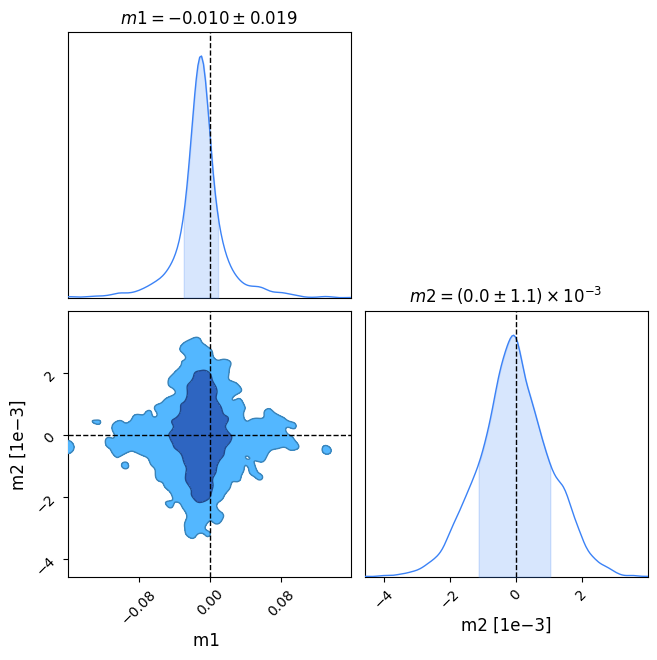

In [45]:
from bpd.diagnostics import get_contour_plot
d = {'m1': (g_plus_samples[:, 0] - g_minus_samples[:, 0]) / 2 / 0.02 - 1, 'm2': 
     (g_plus_samples[:, 1] + g_minus_samples[:, 1]) / 2 }
get_contour_plot([d], ['m1', 'm2'], {'m1':0, 'm2':0});

## New JK results 2

In [3]:
from bpd.io import load_dataset

In [8]:
ds= load_dataset("/pscratch/sd/i/imendoza/data/cache_chains/exp40_43/g_samples_jack_43_43.npz")
ds.keys()


dict_keys(['g_plus', 'g_minus'])

In [11]:
g_plus, g_minus = ds['g_plus'], ds['g_minus'], 
g_plus.shape, g_minus.shape

((50, 1000, 2), (50, 1000, 2))

In [14]:
m_mean_samples = (g_plus[..., 0].mean(axis=1) - g_minus[..., 0].mean(axis=1)) * 0.5 / 0.02 - 1
c_mean_samples = (g_plus[..., 1].mean(axis=1) + g_minus[..., 1].mean(axis=1)) * 0.5

m_mean_samples.shape, c_mean_samples.shape

((50,), (50,))

In [19]:
m_mean = m_mean_samples.mean().item()
m_err = jnp.sqrt(m_mean_samples.var() * (50-1)).item()

m_mean, m_err, jnp.abs(m_mean / m_err).item()

(-0.01900281508027152, 0.004717151237248046, 4.028451521804002)

In [20]:
c_mean = c_mean_samples.mean().item()
c_err = jnp.sqrt(c_mean_samples.var() * (50-1)).item()

c_mean, c_err, jnp.abs(c_mean / c_err).item()

(-0.0014066811717202523, 0.001300286137393242, 1.0818243240986223)

## Low noise

In [3]:
g_samples_plus = jnp.load("/pscratch/sd/i/imendoza/data/cache_chains/exp41_42/g_samples_42_42_plus.npy")
g_samples_minus = jnp.load("/pscratch/sd/i/imendoza/data/cache_chains/exp41_42/g_samples_42_42_minus.npy")
g_samples_minus.shape, g_samples_plus.shape

((3000, 2), (3000, 2))

(array([4.000e+00, 9.000e+00, 2.300e+01, 6.300e+01, 1.701e+03, 1.125e+03,
        5.600e+01, 1.300e+01, 5.000e+00, 1.000e+00]),
 array([-4.14933677e-03, -3.31793311e-03, -2.48652946e-03, -1.65512581e-03,
        -8.23722156e-04,  7.68149606e-06,  8.39085148e-04,  1.67048880e-03,
         2.50189245e-03,  3.33329611e-03,  4.16469976e-03]),
 <BarContainer object of 10 artists>)

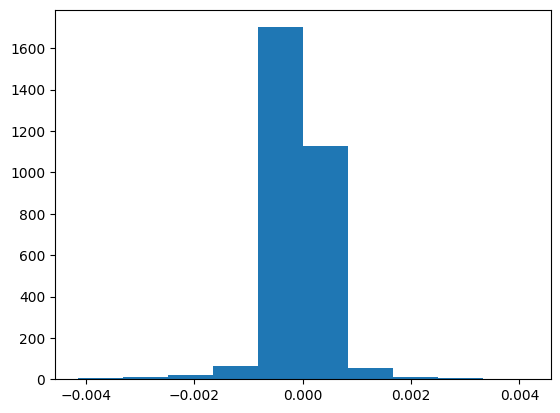

In [4]:
plt.hist((g_samples_plus[:, 0] - g_samples_minus[:, 0]) / 2 / 0.02 -1)

In [5]:
(g_samples_plus[:, 0].mean() - g_samples_minus[:, 0].mean()) / 2 / 0.02 - 1

Array(-2.31088372e-05, dtype=float64)

In [6]:
g_samples_minus[:, 0]

Array([-0.02001691, -0.02001398, -0.02001398, ..., -0.02004814,
       -0.01999532, -0.01995792], dtype=float64)

In [7]:
from bpd.io import load_dataset

ds= load_dataset("/pscratch/sd/i/imendoza/data/cache_chains/exp41_42/g_samples_jack_42_42.npz")
ds.keys()


dict_keys(['g_plus', 'g_minus'])

In [8]:
g_plus, g_minus = ds['g_plus'], ds['g_minus'], 
g_plus.shape, g_minus.shape

((50, 3000, 2), (50, 3000, 2))

In [9]:
g_minus[..., 0].mean(axis=1)

array([-0.02000385, -0.02001381, -0.02000984, -0.02001415, -0.02001347,
       -0.02001389, -0.02001224, -0.02000614, -0.01999798, -0.0200003 ,
       -0.02001314, -0.02001369, -0.02002029, -0.02001344, -0.02000756,
       -0.02001096, -0.0200148 , -0.02001496, -0.02001576, -0.02001315,
       -0.02001549, -0.0200043 , -0.02000814, -0.02001567, -0.02001256,
       -0.02001459, -0.02001511, -0.02001729, -0.02000704, -0.02000419,
       -0.02000798, -0.02000391, -0.02001381, -0.02000913, -0.02001382,
       -0.0200085 , -0.02001091, -0.02001754, -0.02001646, -0.02000457,
       -0.02000862, -0.02000675, -0.02001176, -0.02000874, -0.02001353,
       -0.02001035, -0.02000965, -0.02001154, -0.02001142, -0.02000664])

In [10]:
m_mean_samples = (g_plus[..., 0].mean(axis=1) - g_minus[..., 0].mean(axis=1)) / 2 / 0.02 - 1


In [11]:
m_mean_samples

array([-1.90332745e-05, -8.22393134e-06, -5.49629423e-06, -9.37569903e-06,
       -1.10798702e-05, -1.07157036e-05,  2.26329544e-07, -1.03935514e-05,
       -1.01965505e-05, -2.00114196e-05, -1.02840698e-05, -1.01836245e-05,
       -5.30590069e-06, -4.77553981e-06, -1.05102536e-05, -3.31248828e-06,
       -9.02241233e-06, -1.03582115e-05, -1.08991167e-05, -1.29873663e-05,
       -1.39393221e-05, -1.00858733e-05, -1.26184699e-05, -1.36232164e-05,
       -2.95637457e-05, -1.00303383e-05, -7.42368933e-06, -4.11147499e-06,
       -9.67651334e-06, -7.24105832e-06,  1.86938308e-05, -1.08780740e-05,
       -9.71791171e-06,  1.68435654e-06, -1.12098620e-05, -1.19706617e-05,
       -1.00224276e-05, -6.82942803e-06, -1.05483044e-05, -5.67567165e-06,
       -8.43262339e-06, -1.10805684e-05, -2.15883858e-05, -9.86246491e-06,
       -1.03832897e-05, -1.34240542e-05, -9.92404630e-06, -8.52209557e-06,
       -6.29548010e-06, -9.73052074e-06])

In [17]:
template_cmd = '''python /global/u2/i/imendoza/BPD/experiments/exp40/get_interim_samples.py
                {{seed}} {tag}
                --mode {mode}
                --g1 {g1} --g2 {g2}
                --n-gals {n_gals}
                --n-samples-per-gal {n_samples_per_gal}
                --mean-logflux {mean_logflux}
                --sigma-logflux {sigma_logflux}
                --shape-noise {shape_noise} --sigma-e-int {sigma_e_int}'''.split()
" ".join(template_cmd)

'python /global/u2/i/imendoza/BPD/experiments/exp40/get_interim_samples.py {{seed}} {tag} --mode {mode} --g1 {g1} --g2 {g2} --n-gals {n_gals} --n-samples-per-gal {n_samples_per_gal} --mean-logflux {mean_logflux} --sigma-logflux {sigma_logflux} --shape-noise {shape_noise} --sigma-e-int {sigma_e_int}'

In [13]:
template_cmd.strip?

Signature: template_cmd.strip(chars=None, /)
Docstring:
Return a copy of the string with leading and trailing whitespace removed.

If chars is given and not None, remove characters in chars instead.
Type:      builtin_function_or_method

# Check exp 43, seed 42

In [8]:
from bpd.io import load_dataset

g_jack = load_dataset("/pscratch/sd/i/imendoza/data/cache_chains/exp43_42/g_samples_jack_42_42.npz")
g_jack.keys()

dict_keys(['g_plus', 'g_minus'])

In [11]:
g_jack['g_minus'][:, :, 0]

array([[0.01988626, 0.02003488, 0.01986479, ..., 0.02007257, 0.01979331,
        0.01992438],
       [0.01995859, 0.01995859, 0.01997021, ..., 0.02007208, 0.02005628,
        0.02006425],
       [0.02009189, 0.02001315, 0.01993979, ..., 0.01992257, 0.0200692 ,
        0.01999789],
       ...,
       [0.020036  , 0.01997049, 0.02025009, ..., 0.020053  , 0.01997016,
        0.01997792],
       [0.01993609, 0.01999821, 0.02002059, ..., 0.02016258, 0.02006164,
        0.02002377],
       [0.01983582, 0.01986363, 0.02002089, ..., 0.02006663, 0.01983871,
        0.01993675]])

In [14]:
e_samples = load_dataset("/pscratch/sd/i/imendoza/data/cache_chains/exp41_43/interim_samples_430_plus.npz")


In [15]:
e_samples['e_post'].shape

(250, 300, 2)

# Check exp 42, seed 42 

In [16]:
e_samples = load_dataset("/pscratch/sd/i/imendoza/data/cache_chains/exp42_42/interim_samples_42_minus.npz")


In [18]:
epm = e_samples['e_post']
epm.shape

(1000, 300, 2)

In [19]:
epm[0, :, 0]

array([ 0.02026839,  0.01062752,  0.0207992 ,  0.00867463, -0.00241932,
       -0.05167649, -0.01187401, -0.02002467, -0.00840656,  0.01358962,
        0.00941122,  0.0126395 ,  0.00796278, -0.01575685, -0.00244464,
        0.01156404,  0.02422278, -0.00781306, -0.01534526,  0.01320393,
       -0.01940763,  0.01099101,  0.00271516, -0.01281383,  0.00263431,
       -0.00644436, -0.01379281, -0.00697672, -0.00687232,  0.01072884,
       -0.00154873,  0.00727836, -0.00251267, -0.00364285,  0.00772901,
       -0.01363679, -0.00926352,  0.00119222, -0.03108969,  0.00675698,
       -0.01572667,  0.03503162,  0.0216145 ,  0.00835866,  0.00808854,
       -0.0486384 ,  0.05919603,  0.04905289,  0.03041528, -0.00815077,
       -0.02484042,  0.0215544 , -0.02079258, -0.03916525,  0.00351892,
       -0.08352434, -0.00646959,  0.0014005 ,  0.0014005 ,  0.00878785,
        0.01012286,  0.00298158,  0.00740127, -0.03081465,  0.00374454,
       -0.01048664, -0.00345093,  0.01900705, -0.02244537,  0.00

In [20]:
g_samples = jnp.load("/pscratch/sd/i/imendoza/data/cache_chains/exp42_42/g_samples_42_42_plus.npy")


In [22]:

g_samples[:,0]

Array([0.02, 0.02, 0.02, ..., 0.02, 0.02, 0.02], dtype=float64)